<h1 style="text-align: center;">Experiment 1</h1>

#### Aim: Build an Artificial Neural Network to implement Binary Classification task using the Back-propagation algorithm and test the same using appropriate data sets.

#### Description

The data used here is : '**Pima Indians Diabetes Dataset**'. It is downloaded from : https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv

It is a binary (2-class) classification problem. There are 768 observations with 8 input variables and 1 output variable.

The variable names are as follows:

**1. Number of times pregnant.**

**2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test.**

**3. Diastolic blood pressure (mm Hg).**

**4. Triceps skinfold thickness (mm).**

**5. 2-Hour serum insulin (mu U/ml).**

**6. Body mass index (weight in kg/(height in m)^2).**

**7. Diabetes pedigree function.**

**8. Age (years).**

**9. Class variable (0 or 1).**


 #### Data Import and Processing


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn

In [3]:
# load data
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv'
data_pd = pd.read_csv(url,header = None)
print(data_pd.info())
print(data_pd.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       768 non-null    int64  
 1   1       768 non-null    int64  
 2   2       768 non-null    int64  
 3   3       768 non-null    int64  
 4   4       768 non-null    int64  
 5   5       768 non-null    float64
 6   6       768 non-null    float64
 7   7       768 non-null    int64  
 8   8       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
   0    1   2   3    4     5      6   7  8
0  6  148  72  35    0  33.6  0.627  50  1
1  1   85  66  29    0  26.6  0.351  31  0
2  8  183  64   0    0  23.3  0.672  32  1
3  1   89  66  23   94  28.1  0.167  21  0
4  0  137  40  35  168  43.1  2.288  33  1


StandardScaler: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [4]:
#Scaling Numerical columns
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
scaled = std.fit_transform(data_pd.iloc[:,0:8])
scaled = pd.DataFrame(scaled)
scaled.head()

,0,1,2,3,4,5,6,7
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [5]:
X_data =scaled.to_numpy()
print('X_data:',np.shape(X_data))
Y_data = data_pd.iloc[:,8]
print('Y_data:',np.shape(Y_data))

X_data: (768, 8)
Y_data: (768,)


In [6]:
# Split data into X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.25, random_state= 0)

In [7]:
# Check the dimension of the sets
print('X_train:',np.shape(X_train))
print('y_train:',np.shape(y_train))
print('X_test:',np.shape(X_test))
print('y_test:',np.shape(y_test))

X_train: (576, 8)
y_train: (576,)
X_test: (192, 8)
y_test: (192,)


#### Design the Model

In [8]:
import keras
from keras.models import Sequential   # importing Sequential model
from keras.layers import Dense        # importing Dense layers

In [9]:
# declaring model
basic_model = Sequential()

#### Train the Model

In [10]:
# training the model
basic_model.compile(optimizer="adam", loss="binary_crossentropy")
epochs=120
history = basic_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs)


Epoch 1/120

18/18 [==============================] - 2s 52ms/step - loss: 3.4540 - val_loss: 3.3674
Epoch 2/120
18/18 [==============================] - 0s 10ms/step - loss: 3.4540 - val_loss: 3.3674
Epoch 3/120
18/18 [==============================] - 0s 12ms/step - loss: 3.4540 - val_loss: 3.3674
Epoch 4/120
18/18 [==============================] - 0s 11ms/step - loss: 3.4540 - val_loss: 3.3674
Epoch 5/120
18/18 [==============================] - 0s 11ms/step - loss: 3.4540 - val_loss: 3.3674
Epoch 6/120
18/18 [==============================] - 0s 12ms/step - loss: 3.4540 - val_loss: 3.3674
Epoch 7/120
18/18 [==============================] - 0s 11ms/step - loss: 3.4540 - val_loss: 3.3674
Epoch 8/120
18/18 [==============================] - 0s 11ms/step - loss: 3.4540 - val_loss: 3.3674
Epoch 9/120
18/18 [==============================] - 0s 11ms/step - loss: 3.4540 - val_loss: 3.3674
Epoch 10/120
18/18 [==============================] - 0s 10ms/step - loss: 3.4540 - val_loss: 3.36

18/18 [==============================] - 0s 11ms/step - loss: 3.4540 - val_loss: 3.3674
Epoch 79/120
18/18 [==============================] - 0s 11ms/step - loss: 3.4540 - val_loss: 3.3674
Epoch 80/120
18/18 [==============================] - 0s 11ms/step - loss: 3.4540 - val_loss: 3.3674
Epoch 81/120
18/18 [==============================] - 0s 11ms/step - loss: 3.4540 - val_loss: 3.3674
Epoch 82/120
18/18 [==============================] - 0s 11ms/step - loss: 3.4540 - val_loss: 3.3674
Epoch 83/120
18/18 [==============================] - 0s 12ms/step - loss: 3.4540 - val_loss: 3.3674
Epoch 84/120
18/18 [==============================] - 0s 11ms/step - loss: 3.4540 - val_loss: 3.3674
Epoch 85/120
18/18 [==============================] - 0s 11ms/step - loss: 3.4540 - val_loss: 3.3674
Epoch 86/120
18/18 [==============================] - 0s 10ms/step - loss: 3.4540 - val_loss: 3.3674
Epoch 87/120
18/18 [==============================] - 0s 10ms/step - loss: 3.4540 - val_loss: 3.3674
Epo

#### Evaluate the Model

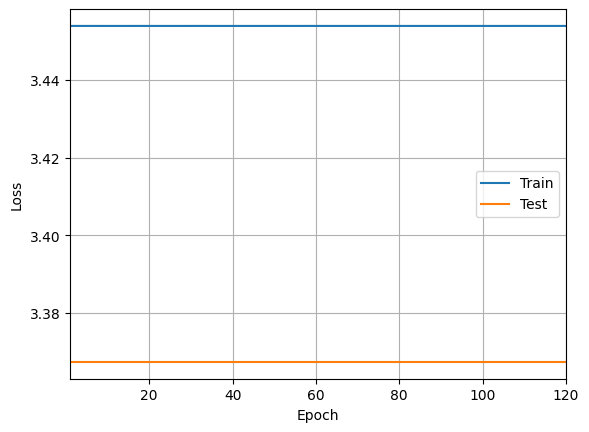

In [11]:
# plot loss vs epochs
epochRange = range(1,epochs+1)
plt.plot(epochRange,history.history['loss'])
plt.plot(epochRange,history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.xlim((1,epochs))
plt.legend(['Train','Test'])
plt.show()

In [12]:
# Plot accuracy vs epochs (DIY)

In [14]:
# Test, Loss, and Accuracy
evaluation = basic_model.evaluate(X_test, y_test)
if isinstance(evaluation, float):
    # If only one metric (usually loss) is returned
    loss = evaluation
    print('Loss = ', loss)
else:
    # If multiple metrics are returned
    loss = evaluation[0]
    accuracy = evaluation[1]
    print('Loss = ', loss)
    print('Accuracy = ', accuracy)


6/6 [==============================] - 0s 5ms/step - loss: 3.3674
Loss =  3.3673744201660156


#### Classification Model Performance measures

<img src='https://editor.analyticsvidhya.com/uploads/99666confusion%20matrix.JPG' width=40%>

In [15]:
y_pred = basic_model.predict(X_test)
print(y_test[:5])
print(y_pred[:5])

6/6 [==============================] - 0s 4ms/step
661    1
122    0
113    0
14     1
529    0
Name: 8, dtype: int64
[[-0.84488505  2.4444783   0.35643175  1.4090945  -0.6928906   1.3843617
   2.784923   -0.95646167]
 [-0.5479186  -0.43485916  0.25303626  0.5936296   0.17539902  0.20401277
  -0.20499448 -0.87137395]
 [ 0.04601434 -1.4050707  -0.36733675 -1.2882122  -0.6928906   0.25478047
  -0.24425603 -0.7011984 ]
 [ 0.3429808   1.4116724   0.14964075 -0.09637905  0.8266162  -0.78595734
   0.34768724  1.5110831 ]
 [-1.1418515  -0.3096706  -0.2122435  -1.2882122  -0.6928906  -0.93826044
   0.5681559  -0.1906719 ]]


#### Conclusion: The loss was found out to be 3.36.